In [5]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# Load the abundance data (in percentages)
csv_path = "/home/dermot.kelly/Dermot_analysis/Phd/Paper_2/rumen_microbiome_pipeline/exported/genus_relative_abundance.csv"
genus_rel_abundance = pd.read_csv(csv_path, index_col=0)

# Initialize a list to collect results
results = []

# Loop over each sample (row)
for sample_id, row in genus_rel_abundance.iterrows():
    abundances = row.values / 100  # convert from percent to proportion
    abundances = abundances[abundances > 0]  # remove zero values

    richness = len(abundances)
    shannon = entropy(abundances, base=np.e)
    simpson = np.sum(abundances ** 2)
    simpson_index = 1 - simpson

    results.append({
        "SampleID": sample_id,
        "Richness": richness,
        "Shannon": round(shannon, 2),
        "Simpson": round(simpson_index, 2)
    })

# Convert results to DataFrame
diversity_df = pd.DataFrame(results)

# Save to CSV
output_path = "/home/dermot.kelly/Dermot_analysis/Phd/Paper_2/rumen_microbiome_pipeline/exported/alph_genus_diversity_metrics.csv"
diversity_df.to_csv(output_path, index=False)

# Optionally display the first few rows
print(diversity_df.head(50))


    SampleID  Richness  Shannon  Simpson
0        498        95     2.30     0.76
1        794        87     1.96     0.69
2        796        96     2.47     0.82
3        811       100     2.28     0.77
4        812        89     2.30     0.78
5        815       105     2.14     0.70
6        818        94     2.45     0.80
7        819        93     2.10     0.70
8        847       102     2.33     0.78
9        875        87     2.33     0.80
10       878       102     2.45     0.78
11       880        89     2.26     0.78
12       882       101     2.21     0.74
13      1691        96     2.41     0.77
14      1692        85     2.19     0.72
15      1693        86     1.99     0.69
16      1694        95     2.29     0.77
17      1695       103     2.36     0.76
18      1696        81     2.08     0.74
19      1697        93     2.19     0.72
20      1698        98     2.15     0.72
21      1700        89     2.11     0.71
22      2053        59     2.34     0.81
23      2056    

In [3]:
summary = diversity_df.iloc[:, 1:].describe().loc[["mean", "std"]]

print(summary.round(2))

      Richness  Shannon  Simpson
mean     96.29     2.33     0.77
std      12.24     0.19     0.04


In [4]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

/data/Genetics/analysis/R1681_OviSeq/Dermot/envs/dermo_python_env/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/data/Genetics/analysis/R1681_OviSeq/Dermot/envs/dermo_python_env/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/data/Genetics/analysis/R1681_OviSeq/Dermot/envs/dermo_python_env/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/data/Genetics/analysis/R1681_OviSeq/Dermot/envs/dermo_python_env/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like a

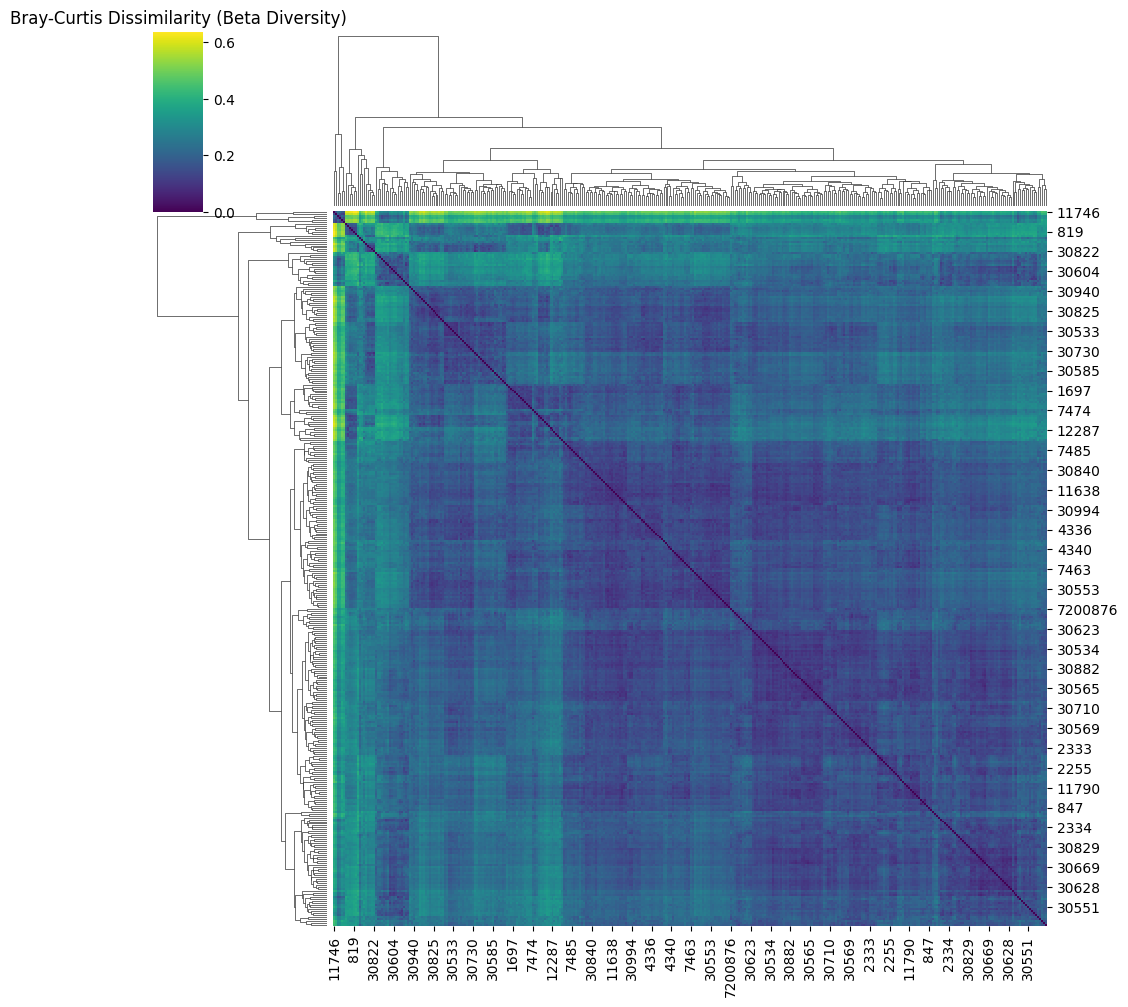

In [5]:
genus_abundance = pd.read_csv(csv_path, index_col=0) / 100

# Compute Bray-Curtis distance matrix
bray_curtis_dist = pdist(genus_abundance.values, metric="braycurtis")
bray_curtis_matrix = pd.DataFrame(
    squareform(bray_curtis_dist),
    index=genus_abundance.index,
    columns=genus_abundance.index
)

# Save distance matrix
#bray_curtis_matrix.to_csv("bray_curtis_distance_matrix.csv")

# Optional: heatmap
sns.clustermap(bray_curtis_matrix, cmap="viridis")
plt.title("Bray-Curtis Dissimilarity (Beta Diversity)")
plt.show()